# Fourier transform
### Theory:
* [wikipedia](https://en.wikipedia.org/wiki/Fourier_transform)
* [википедия](https://ru.wikipedia.org/wiki/%D0%9F%D1%80%D0%B5%D0%BE%D0%B1%D1%80%D0%B0%D0%B7%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%A4%D1%83%D1%80%D1%8C%D0%B5)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

plt.rcParams['figure.figsize'] = (12,4)
plt.rc('font', family='Arial')

np.random.seed(1)

# Task1
#### Computing

In [2]:
input_signal = np.array([[[0]*20, [1]*20, [0]*20]*2]).flatten()
signal_len = len(input_signal)

fft_signal = np.fft.fft(input_signal)  # discrete fourier transform
signal_size = fft_signal.size

fft_gibs_signal = fft_signal.copy()
fft_gibs_signal[int(signal_len/8-1):int(signal_len/2-1)] = 0  # restrict harmonics

ifft_signal = np.fft.ifft(fft_signal)  # inverse discrete fourier transform
ifft_gibs_signal = np.fft.ifft(fft_gibs_signal)  

fft_afr = abs(fft_signal)
fft_pfr = np.angle(fft_signal)

#### Plotting

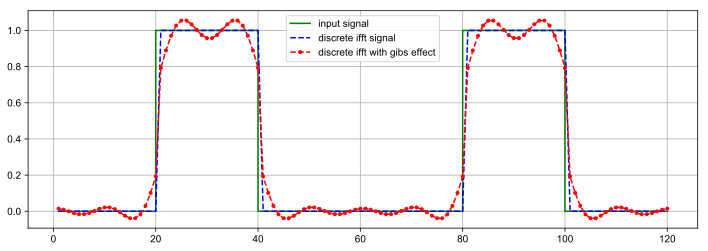

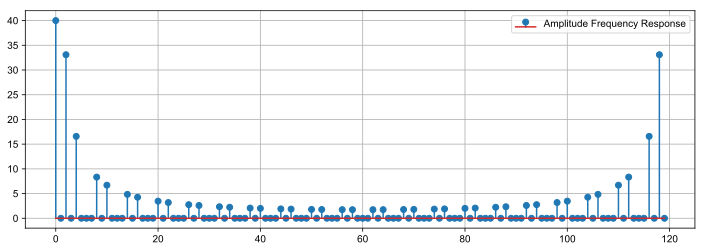

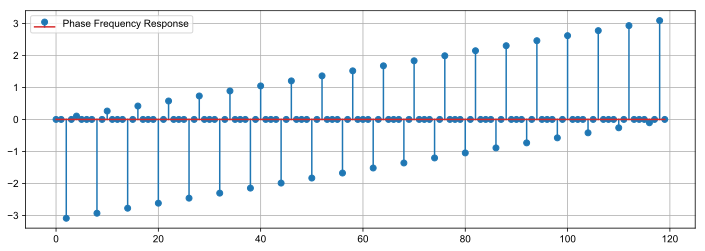

C:\Users\d_pch\Anaconda3\lib\site-packages\matplotlib\figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


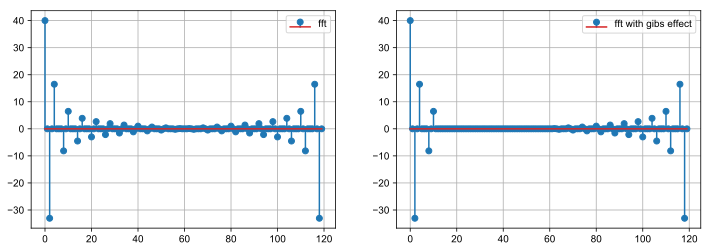

In [3]:
plt.step(range(1,len(input_signal)+1), input_signal, 'g')
plt.plot(range(1,len(ifft_signal)+1), ifft_signal.real, 'b--')
plt.plot(range(1,len(ifft_gibs_signal)+1), ifft_gibs_signal.real, 'r.--')
plt.legend(["input signal", "discrete ifft signal", "discrete ifft with gibs effect"])
plt.grid()
plt.show();

plt.stem(fft_afr)
plt.legend(["Amplitude Frequency Response"])
plt.grid()
plt.show();

plt.stem(fft_pfr)
plt.legend(["Phase Frequency Response"])
plt.grid()
plt.show();

fig, ax = plt.subplots(1, 2)
ax[0].stem(fft_signal.real)
ax[0].legend(["fft"])
ax[0].grid()
ax[1].stem(fft_gibs_signal.real)
ax[1].legend(["fft with gibs effect"])
ax[1].grid()
fig.show();

## Task2 
#### Computing

In [4]:
size=100
step=int(size/20)
x = np.linspace(0,size,size, dtype=int)
y = np.sin(x) + 7*np.cos(x) + np.sin(7*x) + np.random.mtrand.uniform(size=size)  # input signal

fft = np.fft.fft(y)  
ifft = np.fft.ifft(fft)
bad_ifft = np.fft.ifft(fft[::step])
bad_fft = np.fft.fft(y[::step])

#### Plotting

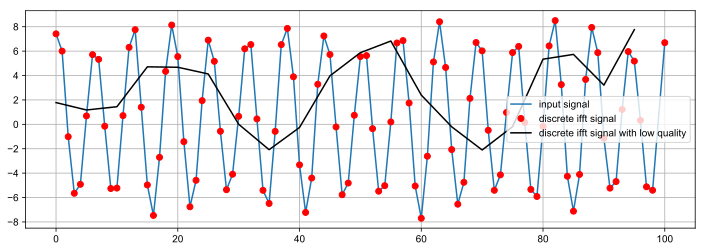

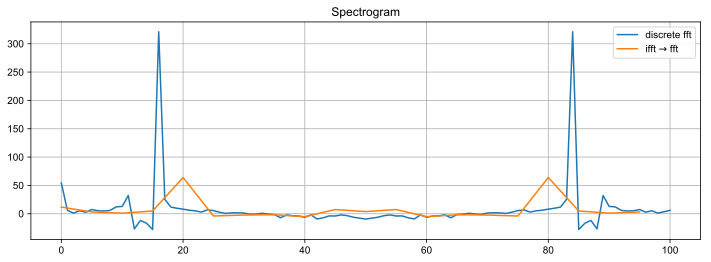

In [5]:
plt.plot(x, y, x, ifft.real, 'or', x[::step], bad_ifft.real, '-k')
plt.legend(["input signal", "discrete ifft signal", "discrete ifft signal with low quality"])
plt.grid()
plt.show();

plt.plot(x, fft.real, x[::step], bad_fft.real)
plt.legend(["discrete fft", r"ifft $\to$ fft"])
plt.title("Spectrogram")
plt.grid()
plt.show();